In [1]:
from dypac import dypac
from niak_load_confounds import load_confounds
import niak_load_confounds
import numpy as np
import sklearn as sk
import scipy as sp
import os
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMapsMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
from joblib import Memory

In [2]:
path_base = '/home/lussier/Projects/data/embeddings'
path_func = 'func'
#path_anat = 'anat'
anat = datasets.load_mni152_template()#os.path.join(path_base,path_anat,'template_aal.nii.gz')

In [3]:
func = []
func_file = open((os.path.join(path_base,path_func, 'functional.txt')),'r')
for line in func_file:
    func.append(os.path.join(path_base,path_func, (line.strip())))#.split(','))
func_file.close()
print (func)

['/home/lussier/Projects/data/embeddings/func/fmri_sub0050002_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050003_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050004_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050005_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050006_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050007_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050008_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050009_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050010_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050011_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050012_session1_run1_n.nii.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub

In [4]:
conf_list = []
conf_file = open((os.path.join(path_base,path_func, 'confounds.txt')),'r')
for line in conf_file:
    conf_list.append(os.path.join(path_base,path_func, (line.strip())))#.split(','))
conf_file.close()
print (conf_list)

['/home/lussier/Projects/data/embeddings/func/fmri_sub0050002_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050003_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050004_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050005_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050006_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050007_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050008_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050009_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050010_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings/func/fmri_sub0050011_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/embeddings

In [5]:
conf = []
for idx in conf_list:
    conf.append(load_confounds(idx))
conf

[     motion_pca_1  motion_pca_2  slow_drift  slow_drift.1  slow_drift.2  \
 0       -0.450352     -0.217675    1.403441      1.410601      1.403441   
 1       -0.442465     -0.266731    1.403260      1.409876      1.401810   
 2       -0.441303     -0.243097    1.402716      1.407703      1.396922   
 3       -0.405134     -0.228874    1.401810      1.404083      1.388789   
 4       -0.468278     -0.275378    1.400542      1.399020      1.377427   
 ..            ...           ...         ...           ...           ...   
 191      0.112950      0.550532   -1.413307      1.392520     -1.377260   
 192      0.189975      0.603664   -1.414937      1.399020     -1.391822   
 193      0.068669      0.488613   -1.416205      1.404083     -1.403183   
 194      0.154797      0.577134   -1.417110      1.407703     -1.411317   
 195      0.095409      0.500979   -1.417654      1.409876     -1.416205   
 
      slow_drift.3  slow_drift.4    wm_avg  vent_avg  
 0        1.410601      1.40344

In [60]:
model = dypac(n_clusters=100, n_states=100, verbose=1, n_batch=21, n_init=1, n_init_aggregation=1, n_replications=30, 
                      detrend=False, smoothing_fwhm=5, standardize=True, threshold_sim=0.2)
model.fit(func, confounds=conf)

[MultiNiftiMasker.fit] Loading data from [/home/lussier/Projects/data/embeddings/func/fmri_sub0050002_session1_run1_n.nii.gz, /home/lussier/Projects/data/embeddings/func/fmri_sub0050003_session1_run1_n.nii.gz, /home/lussier/Projects/data/emb
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[dypac] Processing batch 0
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050002_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #0:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050025_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #1:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050046_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #2:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050108_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050129_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050146_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050155_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050163_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050170_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050199_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050234_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050255_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050282_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050310_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050340_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050365_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050397_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050443_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050464_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050485_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050506_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050527_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050567_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:51<00:00,  1.72s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050610_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050685_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050706_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050738_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050773_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050794_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #28:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050815_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050961_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050983_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051006_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051028_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051052_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051073_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051095_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051116_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051137_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051204_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051225_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051246_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [00:58<00:00,  1.93s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051267_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051296_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051317_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051339_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051360_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051463_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051484_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051567_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 428.28it/s]


[dypac] Processing batch 1
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050003_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050026_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050047_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050109_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050130_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050146_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050156_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050163_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050171_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:01<00:00,  2.03s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050200_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050235_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050257_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050284_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050311_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:17<00:00,  2.59s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050341_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050366_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050406_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050444_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050465_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050486_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050507_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050528_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050568_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050611_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050686_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050707_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050739_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050774_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050795_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050816_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #29:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050962_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050984_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051007_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051029_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051053_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051074_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051096_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051117_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #37:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051138_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051205_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051226_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051247_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051268_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051297_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051318_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051340_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051361_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051464_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051485_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051568_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 459.65it/s]


[dypac] Processing batch 2
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050004_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050027_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050048_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:18<00:00,  2.60s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050110_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050131_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050146_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050156_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050164_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050171_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050201_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050236_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050259_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:01<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050285_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050312_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050342_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050367_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050410_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050445_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050466_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050487_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050508_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050529_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050569_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050612_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:46<00:00,  1.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050687_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050708_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050740_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050775_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050796_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050817_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050964_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050985_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051008_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051030_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051054_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051075_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051097_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051118_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051139_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051206_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051227_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051248_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051269_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051298_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051319_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051341_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051362_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051465_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #47:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051486_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051569_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 382.01it/s]


[dypac] Processing batch 3
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050005_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050028_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050049_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050111_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050132_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050147_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050156_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050164_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050171_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050202_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050237_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050260_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050286_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:15<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050314_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050343_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050369_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050412_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050446_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050467_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:07<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050488_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050509_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050530_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050570_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050613_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050688_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050709_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050741_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050776_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050797_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050818_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050965_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050986_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051009_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051032_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051055_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051076_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051098_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051119_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051140_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051207_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051228_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051249_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051270_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051299_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:15<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051320_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051342_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051363_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:03<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051466_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051487_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051570_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 393.01it/s]


[dypac] Processing batch 4
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050006_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050029_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050050_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050112_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050133_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050147_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050157_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050165_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050182_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050203_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050238_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050261_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050289_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050315_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050345_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:16<00:00,  2.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050370_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050416_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [00:45<00:00,  1.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050447_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050468_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050489_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:15<00:00,  2.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050510_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050531_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050571_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:56<00:00,  1.90s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050614_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:54<00:00,  1.83s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050689_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050710_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050742_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050777_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050798_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050819_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050966_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050987_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051010_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051033_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051056_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051077_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051099_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051120_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051141_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051208_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:16<00:00,  2.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051229_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051250_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051271_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051300_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051321_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051343_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051364_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051467_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #47:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051488_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051571_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 460.81it/s]


[dypac] Processing batch 5
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050007_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050030_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050051_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050113_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050134_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050147_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050157_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050165_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050183_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050204_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050239_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050262_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050290_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050316_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050347_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050371_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:16<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050417_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050448_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050469_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050490_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050511_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050532_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050572_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050615_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:18<00:00,  2.62s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050690_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050711_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050743_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050778_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050799_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050820_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050967_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050988_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051011_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051034_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051057_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051078_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051100_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051121_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:07<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051142_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051209_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051230_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051251_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051272_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051301_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051322_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051344_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051365_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051468_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051489_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051572_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 420.13it/s]


[dypac] Processing batch 6
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050008_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050031_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050052_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050114_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050135_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050148_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050157_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050165_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050184_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050205_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050240_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050263_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050291_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050317_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050348_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050373_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:18<00:00,  2.61s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050418_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050449_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050470_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050491_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050512_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050551_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050573_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050616_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050691_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050722_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050744_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:16<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050779_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050800_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050821_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050968_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050989_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051012_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051035_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051058_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051079_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051101_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051122_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051146_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051210_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051231_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051252_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051273_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051302_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051323_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051345_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051366_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051469_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #47:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051490_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051573_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 401.91it/s]


[dypac] Processing batch 7
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050009_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050032_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050053_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050115_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050136_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050148_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050158_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050166_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050185_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:16<00:00,  2.55s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050206_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050241_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050264_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050292_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050318_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050349_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050374_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050422_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050450_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050471_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050492_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050513_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050552_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050574_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050617_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050692_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050723_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050745_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050780_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050801_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050822_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050969_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050990_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051013_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051036_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051059_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051080_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051102_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051123_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051147_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051211_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051232_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051253_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051274_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051303_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051324_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051346_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051367_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051470_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051491_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051574_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 397.45it/s]


[dypac] Processing batch 8
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050010_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #0:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050033_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050054_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050116_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050137_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050148_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050158_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050166_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050186_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050207_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:20<00:00,  2.69s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050242_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050265_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050293_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050319_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050351_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050375_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050424_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050451_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #17:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050472_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050493_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050514_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050553_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:59<00:00,  1.98s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050575_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050618_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:20<00:00,  2.70s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050693_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050724_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050746_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050781_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050802_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050823_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050970_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050991_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051014_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051038_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051060_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051081_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051103_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051124_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:07<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051148_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051212_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051233_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051254_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051275_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051304_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:18<00:00,  2.62s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051325_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051347_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051368_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051471_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051492_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051575_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 492.98it/s]


[dypac] Processing batch 9
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050011_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050034_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050055_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050117_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #3:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050142_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050149_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050159_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050166_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050187_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050208_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050243_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050266_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050296_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050320_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050352_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050376_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050428_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050452_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050473_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050494_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050515_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050554_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050576_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050619_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050694_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:17<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050725_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:16<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050747_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050782_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:16<00:00,  2.55s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050803_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050824_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050971_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050992_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051015_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051039_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051061_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051082_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051104_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051125_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051149_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051213_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051234_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051255_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051276_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:01<00:00,  2.05s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051305_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051326_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051348_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051369_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051472_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051493_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051576_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 442.97it/s]


[dypac] Processing batch 10
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050012_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050035_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050056_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050118_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #3:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050142_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050149_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050159_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:03<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050167_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050188_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050209_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050244_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050267_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050297_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050321_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050353_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050378_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:15<00:00,  2.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050432_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050453_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050474_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050495_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050516_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050555_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050577_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050620_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050695_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050726_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:15<00:00,  2.53s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050748_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050783_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050804_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050825_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050972_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050993_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051016_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051040_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051062_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051083_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051105_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051126_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051150_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051214_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051235_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051256_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051277_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051306_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051327_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051349_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051370_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #46:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:01<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051473_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051556_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051577_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:00<00:00,  2.03s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 411.67it/s]


[dypac] Processing batch 11
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050013_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050036_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:00<00:00,  2.03s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050057_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050119_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050142_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050150_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050159_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050167_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050189_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050210_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050245_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050268_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050300_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050322_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:16<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050354_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050379_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050433_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050454_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050475_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050496_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050517_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050556_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:54<00:00,  1.82s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050578_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:19<00:00,  2.65s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050621_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050696_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050727_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050749_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:16<00:00,  2.55s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050784_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:19<00:00,  2.64s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050805_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:18<00:00,  2.63s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050826_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:18<00:00,  2.61s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050973_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050994_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051017_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:15<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051041_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051063_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051084_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051106_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:03<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051127_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #37:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051151_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:03<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051215_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051236_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051257_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:01<00:00,  2.05s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051278_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051307_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051328_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051350_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051371_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051474_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051557_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051578_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 446.90it/s]


[dypac] Processing batch 12
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050014_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #0:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:01<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050037_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050058_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050120_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050143_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050150_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050160_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050167_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050190_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050211_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050246_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050269_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:00<00:00,  2.03s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050301_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050323_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050355_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050380_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:17<00:00,  2.60s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050434_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050455_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050476_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050497_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050518_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050557_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:52<00:00,  1.76s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050601_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050622_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:51<00:00,  1.71s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050697_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050728_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050750_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050785_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050806_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050952_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:10<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050974_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050995_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051018_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051042_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051064_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051085_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051107_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051128_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #37:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051152_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051216_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051237_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051258_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:19<00:00,  2.66s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051279_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051308_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051329_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051351_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051372_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051475_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051558_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051579_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 440.44it/s]


[dypac] Processing batch 13
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050015_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #0:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050038_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #1:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050059_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050121_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #3:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050143_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050152_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050160_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050168_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050191_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050212_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050247_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050270_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050302_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:17<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050324_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050356_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050381_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050435_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050456_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #17:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050477_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:10<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050498_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050519_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050558_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:52<00:00,  1.76s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050602_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:15<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050623_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050698_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:13<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050730_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050751_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050786_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050807_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050953_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050975_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050996_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051019_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051044_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051065_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051086_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051108_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051129_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #37:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051153_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051217_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051238_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051259_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051280_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051309_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051330_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051352_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:19<00:00,  2.66s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051373_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051476_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051559_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051580_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 434.85it/s]


[dypac] Processing batch 14
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050016_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:03<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050039_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050060_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050122_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050143_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050152_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050160_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050168_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050192_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050213_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050248_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050271_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050303_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050325_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050357_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050382_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050436_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050457_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050478_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050499_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050520_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050559_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050603_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:51<00:00,  1.73s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050624_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:51<00:00,  1.72s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050699_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050731_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050752_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050787_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050808_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050954_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050976_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050997_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051020_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051045_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051066_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051087_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051109_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051130_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #37:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051154_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051218_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051239_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051260_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051281_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051310_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051331_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051353_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:17<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051456_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051477_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051560_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051581_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 444.09it/s]


[dypac] Processing batch 15
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050017_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050040_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #1:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050102_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #2:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050123_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #3:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050144_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050152_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050161_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050168_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050193_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050214_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050249_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050274_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050304_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050329_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050358_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050383_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050437_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050458_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050479_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050500_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050521_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050560_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050604_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050625_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050700_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050732_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:13<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050753_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:17<00:00,  2.59s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050788_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:17<00:00,  2.57s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050809_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050955_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050977_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050998_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051021_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051046_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051067_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051088_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051110_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051131_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051155_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051219_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051240_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051261_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #41:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051282_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051311_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051332_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #44:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051354_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051457_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051478_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051561_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051582_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 408.26it/s]


[dypac] Processing batch 16
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050019_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050041_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050103_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050124_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050144_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050153_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050161_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050169_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050194_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050215_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050250_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #10:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050275_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050305_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050330_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050359_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050385_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050438_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050459_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050480_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050501_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050522_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050561_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050605_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050626_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050701_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:20<00:00,  2.67s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050733_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050754_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050789_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #27:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050810_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050956_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050978_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050999_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051023_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051047_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051068_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051089_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051111_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051132_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051156_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051220_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051241_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:04<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051262_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051291_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051312_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051333_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051355_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051458_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051479_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051562_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051583_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 437.93it/s]


[dypac] Processing batch 17
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050020_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050042_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050104_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050125_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050144_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050153_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050161_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050169_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:15<00:00,  2.51s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050195_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050216_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050251_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050278_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050306_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050331_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050360_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050386_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050439_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050460_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050481_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050502_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050523_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050562_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #21:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050606_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050627_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050702_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:11<00:00,  2.39s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050734_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050755_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050790_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050811_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050957_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050979_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051000_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051024_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051048_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051069_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051090_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051112_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051133_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051159_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051221_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:04<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051242_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051263_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051292_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051313_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051334_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051356_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051459_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051480_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #47:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051563_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051584_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 422.10it/s]


[dypac] Processing batch 18
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050022_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050043_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #1:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050105_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #2:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:04<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050126_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #3:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050145_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050153_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050162_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050169_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050196_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050217_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #9:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050252_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050279_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050307_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050332_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050361_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:12<00:00,  2.42s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050387_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050440_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #16:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050461_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #17:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050482_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050503_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050524_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050563_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050607_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050628_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050703_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050735_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050756_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050791_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:09<00:00,  2.30s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050812_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #28:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050958_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #29:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050980_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051001_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051025_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051049_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051070_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051091_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:00<00:00,  2.03s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051113_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051134_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051201_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051222_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #39:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [00:59<00:00,  1.99s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051243_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #40:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:00<00:00,  2.01s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051264_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051293_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #42:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [00:59<00:00,  1.99s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051314_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051335_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051357_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:17<00:00,  2.58s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051460_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051481_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051564_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051585_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:08<00:00,  2.29s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 465.54it/s]


[dypac] Processing batch 19
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050023_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #0:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050044_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050106_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050127_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050145_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050155_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050162_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050170_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050197_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050232_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050253_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050280_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050308_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050334_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050362_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050388_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050441_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050462_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050483_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #18:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050504_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #19:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050525_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #20:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050564_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [00:56<00:00,  1.87s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050608_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [00:55<00:00,  1.85s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050682_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:14<00:00,  2.47s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050704_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #24:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:08<00:00,  2.28s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050736_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #25:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050757_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #26:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050792_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #27:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050813_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050959_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050981_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051002_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051026_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051050_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051071_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051093_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #35:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051114_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051135_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051202_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #38:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051223_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051244_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051265_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051294_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:12<00:00,  2.40s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051315_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #43:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051336_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051358_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051461_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051482_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051565_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051606_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #49:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 418.81it/s]


[dypac] Processing batch 20
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050024_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050045_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050107_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050128_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #3: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050145_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #4:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #4: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050155_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #5:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #5: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050162_session1_run3_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #6:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #6: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050170_session1_run2_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images


Replicating clusters in data #7:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #7: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050198_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #8:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #8: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050233_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #9: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050254_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #10: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050281_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #11:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #11: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050309_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #12:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #12: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050339_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #13:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #13: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050364_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #14:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #14: 100%|██████████| 30/30 [01:10<00:00,  2.36s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050390_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #15:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #15: 100%|██████████| 30/30 [01:09<00:00,  2.33s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050442_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #16: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050463_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #17:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #17: 100%|██████████| 30/30 [01:07<00:00,  2.25s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050484_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #18: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050505_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #19: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050526_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #20: 100%|██████████| 30/30 [01:07<00:00,  2.23s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050565_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #21: 100%|██████████| 30/30 [01:09<00:00,  2.32s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050609_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #22:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #22: 100%|██████████| 30/30 [01:04<00:00,  2.15s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050683_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #23:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #23: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050705_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #24: 100%|██████████| 30/30 [01:09<00:00,  2.31s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050737_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #25: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050772_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #26: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050793_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #27: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050814_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #28: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050960_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #29: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0050982_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #30:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #30: 100%|██████████| 30/30 [01:01<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051003_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #31:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #31: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051027_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #32:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #32: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051051_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #33:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #33: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051072_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #34:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #34: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051094_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #35: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051115_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #36:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #36: 100%|██████████| 30/30 [01:03<00:00,  2.13s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051136_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #37: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051203_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #38: 100%|██████████| 30/30 [01:11<00:00,  2.38s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051224_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #39: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051245_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #40: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051266_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #41: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051295_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #42: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051316_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #43: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051338_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #44: 100%|██████████| 30/30 [01:10<00:00,  2.35s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051359_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #45:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #45: 100%|██████████| 30/30 [01:11<00:00,  2.37s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051462_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #46: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051483_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #47: 100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051566_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


Replicating clusters in data #48:   0%|          | 0/30 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #48: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/lussier/Projects/data/embeddings/func/fmri_sub0051607_session1_run1_n.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Replicating clusters in data #49: 100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


Consensus clustering.


Trimming states: 100%|██████████| 100/100 [00:00<00:00, 420.28it/s]


dypac(detrend=False, high_pass=None, low_pass=None, mask=None, mask_args=None,
      mask_strategy='epi', max_iter=30, memory=Memory(location=None),
      memory_level=1, n_batch=21, n_clusters=100, n_init=1,
      n_init_aggregation=1, n_replications=30, n_states=100,
      random_state=RandomState(MT19937) at 0x7F0225582570, smoothing_fwhm=5,
      standardize=True, subsample_size=30, t_r=None, target_affine=None,
      target_shape=None, threshold_sim=0.2, verbose=1)

In [61]:
import pickle
pickle.dump(model, open("dypac_abide_sub1050clu100sta100bat21rep30thr02.pickle", "wb"))

/home/lussier/.local/lib/python3.6/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



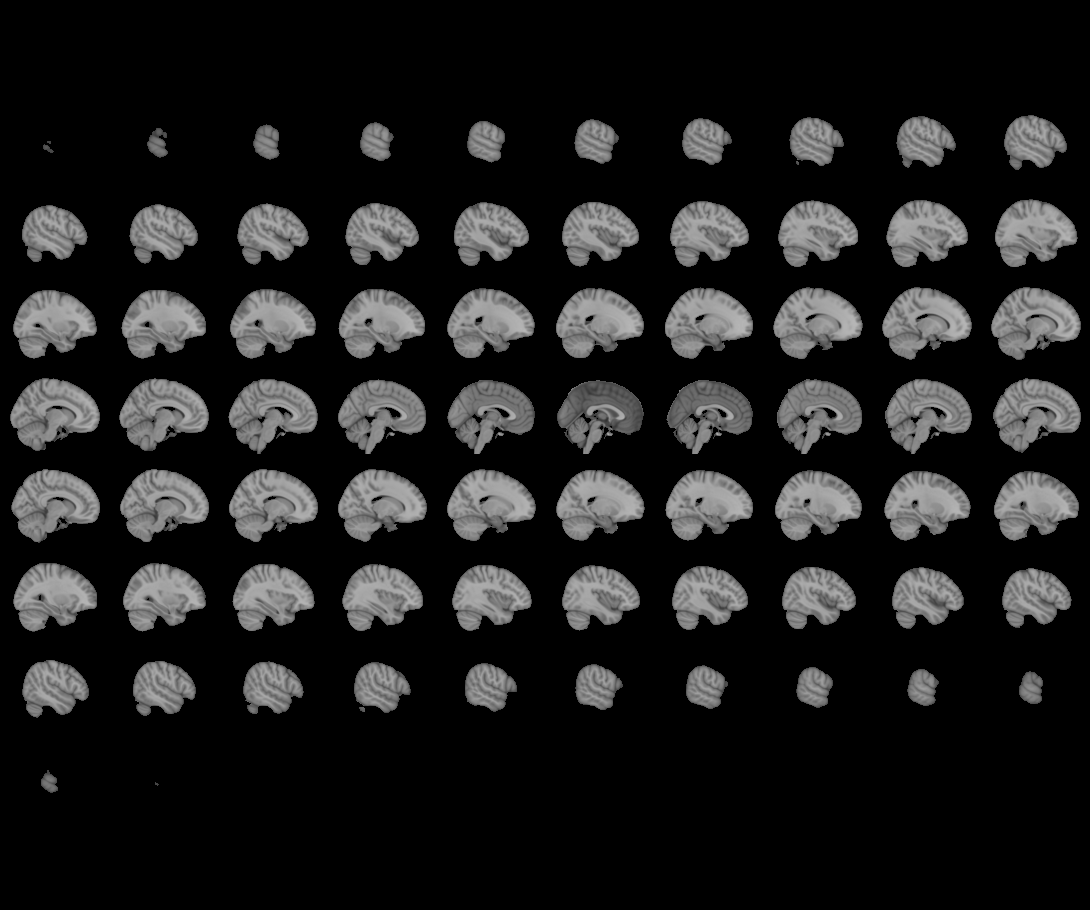
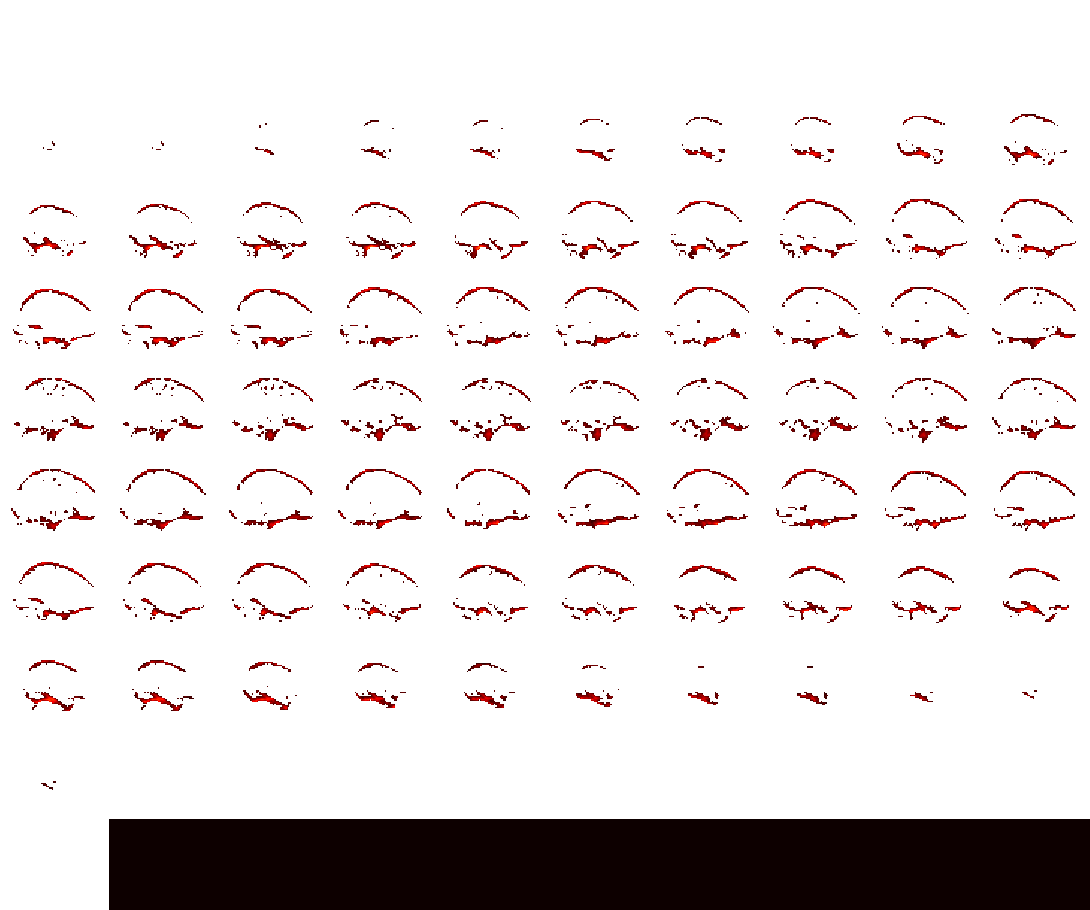

In [59]:
num_comp = 3
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, bg_img=anat, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

In [ ]:
#tseries = model.masker_.transform(func[0], conf[0])

tseries = []
for f, c in zip(func, conf):
    tseries.append(model.masker_.transform(f, c))
tseries[0]

In [ ]:
#weights = model.transform_sparse(func[0], conf[0])

weights = []
for f, c in zip(func, conf):
    weights.append(model.transform_sparse(f, c))
weights[0]

In [ ]:
plt.plot(weights[0][:, num_comp])

In [ ]:
num_t = 40
img = model.masker_.inverse_transform(tseries[1][num_t, :])
plotting.view_img(img, bg_img=anat, cut_coords=[2, -22, 10], vmax=4)

In [ ]:
img_r = model.masker_.inverse_transform(weights[1][num_t,:] * model.components_)
plotting.view_img(img_r, bg_img=anat, cut_coords=[2, -22, 10], vmax=4)

In [ ]:
img_diff = image.new_img_like(img, img.get_fdata() - img_r.get_fdata())
plotting.view_img(img_diff, bg_img=anat, cut_coords=[2, -22, 10], vmax=4)

In [ ]:
for tt in range(0,tseries[1].shape[0]):
    img = model.masker_.inverse_transform(tseries[1][tt, :])
    if (tt==0):
        diff = np.square(img.get_fdata()) # The data is demeaned, so this is a square diff to the mean
    else:
        diff = diff + np.square(img.get_fdata())
img_orig_std = image.new_img_like(img, diff / tseries[0].shape[0])
plotting.view_img(img_orig_std, bg_img=anat, cut_coords=[2, -22, 10])

In [ ]:
for tt in range(0,tseries[1].shape[0]):
    img = model.masker_.inverse_transform(tseries[1][tt, :])
    img_r = model.masker_.inverse_transform(weights[1][tt,:] * model.components_)
    if (tt==0):
        diff = np.square(img.get_fdata() - img_r.get_fdata())
    else:
        diff = diff + np.square(img.get_fdata() - img_r.get_fdata())
img_std = image.new_img_like(img, diff / tseries[1].shape[0])
img_std.to_filename(os.path.join(path_base,'test2r2map02.nii.gz'))
plotting.view_img(img_std, bg_img=anat, cut_coords=[2, -22, 10], vmax=1)